### Cats and Dogs: Data Augmentation

In [31]:
import numpy as np
import os, shutil
import cv2
import keras
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm

In [18]:
# Load the data
dataset_dir = "C:/Users/user/Desktop/Computer-Vision-with-Keras/datasets/images/"
file_names = [f for f in os.listdir(dataset_dir) if os.path.isfile(os.path.join(dataset_dir, f))]
print(str(len(file_names))+" images loaded!")

3002 images loaded!


* We need to store the labels (y_train, y_test)
* We need to resize the images to maintain a constant dimension of 150 x 150
* 2k images for training and 1k images for validation
* Dogs - 1 and cats - 0

In [19]:
# Prepare image data
base_dir = "C:/Users/user/Desktop/Computer-Vision-with-Keras/"
#dataset_dir = "C:/Users/user/Desktop/Computer-Vision-with-Keras/datasets/images"
dest_dir = 'C:/Users/user/Desktop/Computer-Vision-with-Keras/catsvsdogs/'

dog_cnt = 0
cat_cnt = 0
training_size = 1000
test_size = 500
training_images = []
training_labels = []
test_images = []
test_labels = []
size = 150


def makedir(destination):
    if os.path.exists(destination):
        shutil.rmtree(destination)
    os.mkdir(destination)

    train = os.path.join(destination, 'train/')
    os.mkdir(train)

    test = os.path.join(destination, 'test/')
    os.mkdir(test)

    train_cat = os.path.join(train, 'cat/')
    os.mkdir(train_cat)

    train_dog = os.path.join(train, 'dog/')
    os.mkdir(train_dog)

    test_cat = os.path.join(test, 'cat/')
    os.mkdir(test_cat)

    test_dog = os.path.join(test, 'dog/')
    os.mkdir(test_dog)
    
    return train_cat, train_dog, test_cat, test_dog
    
def getZeros(number):
    if (number > 10 and number < 100):
        return "0"
    if (number < 10):
        return "00"
    else:
        return ""

In [32]:
# Create directories and extract dataset
def create_extract(fileName, dog_count, cat_count):
    cat_dir_train, dog_dir_train, cat_dir_val, dog_dir_val = makedir(dest_dir)
    print("Extracting data.....")
    for i, file in tqdm(enumerate(fileName)):
        if fileName[i][0] == "d":
            dog_count += 1
            image = cv2.imread(dataset_dir+file)
            image = cv2.resize(image, dsize = (size, size), interpolation=cv2.INTER_AREA)
            if dog_count <= training_size:
                training_images.append(image)
                training_labels.append(1)
                zeros = getZeros(dog_count)
                cv2.imwrite(dog_dir_train + "dog" +str(zeros) + str(dog_count) + ".jpg", image)
            if dog_count > training_size and dog_count <= training_size + test_size:
                test_images.append(image)
                test_labels.append(1)
                zeros = getZeros(dog_count-1000)
                cv2.imwrite(dog_dir_val + "dog" + str(zeros) + str(dog_count - 1000) + ".jpg", image)
        if file_names[i][0] == "c":
            cat_count += 1
            image = cv2.imread(dataset_dir+file)
            image = cv2.resize(image, dsize = (size, size), interpolation=cv2.INTER_AREA)
            if cat_count <= training_size:
                training_images.append(image)
                training_labels.append(0)
                zeros = getZeros(cat_count)
                cv2.imwrite(cat_dir_train + "cat" + str(zeros) + str(cat_count) + ".jpg", image)
            if cat_count > training_size and cat_count <= training_size + test_size:
                test_images.append(image)
                test_labels.append(0)
                zeros = getZeros(cat_count-1000)
                cv2.imwrite(cat_dir_val + "cat" + str(zeros) + str(cat_count - 1000) + ".jpg", image)
        if dog_count == training_size + test_size and cat_count == training_size + test_size:
            break
    print("Training and Test Data Extraction Complete!")

In [33]:
# Save the dataset's to NPZ files
create_extract(file_names, dog_cnt, cat_cnt)
np.savez("catsvsdogs_train_data.npz", np.array(training_images))
np.savez("catsvsdogs_train_label.npz", np.array(training_labels))
np.savez("catsvsdogs_test_data.npz", np.array(test_images))
np.savez("catsvsdogs_test_label.npz", np.array(test_labels))
print("Training and Test Data saved!")

Extracting data.....


3002it [01:50, 27.22it/s]


Training and Test Data Extraction Complete!
Training and Test Data saved!


                        TRAINING IMAGES


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 16.28it/s]


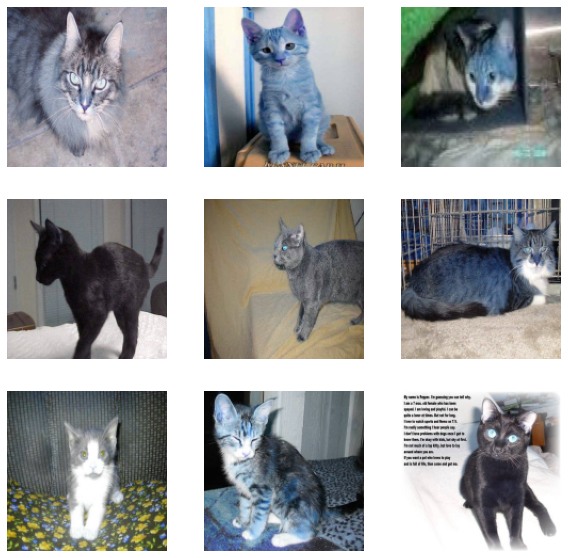

                        TEST IMAGES


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 27.61it/s]


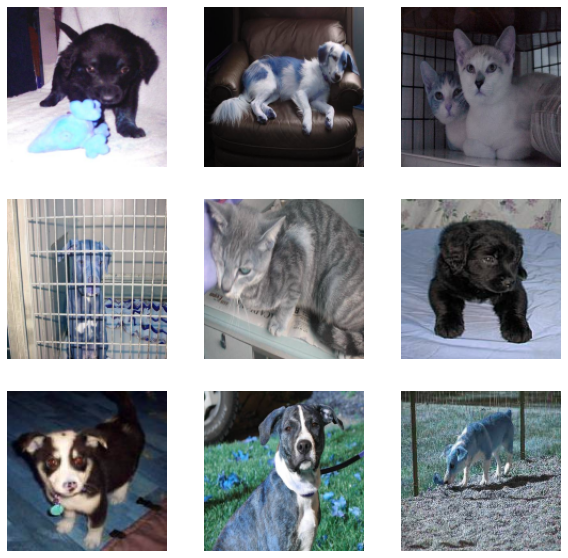

In [34]:
# Display some images
def display_image(trainingImages):
    fig = plt.figure(figsize= (10, 10))
    rows = 3
    cols = 3

    for i in tqdm(range(1, 10)):
        fig.add_subplot(rows, cols, i)
        rand = np.random.randint(0, 1000)
        plt.imshow(trainingImages[rand])
        plt.axis("off")
    plt.show()
print("                        TRAINING IMAGES")
print("==========================================================================")
display_image(training_images)
print("                        TEST IMAGES")
print("==========================================================================")
display_image(test_images)

In [24]:
def load_data(dataset_name):
    data = np.load(dataset_name + "_train_data.npz")
    train = data['arr_0']
    
    data = np.load(dataset_name + "_train_label.npz")
    train_labels = data['arr_0']
    
    data = np.load(dataset_name + "_test_data.npz")
    test = data['arr_0']
    
    data = np.load(dataset_name + "_test_label.npz")
    test_labels = data['arr_0']   
    
    return (train, train_labels), (test, test_labels)

In [25]:
# Load data into memory and preprocess
(X_train, y_train), (X_test, y_test) = load_data("catsvsdogs")

X_train = X_train.astype("float32")
X_train /= 255
X_test = X_test.astype("float32")
X_test /= 255

y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)

In [26]:
y_train.shape

(2000, 1)

In [119]:
# Build the model
from tensorflow.keras.models import Sequential
from __future__ import print_function
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

BATCH_SIZE = 16
EPOCHS = 25
INPUT_SHAPE = X_train.shape[1:]

def build_model(input_shape, n_filters, kernel_size, dropout_prob = 0):
    assert kernel_size > 0 and n_filters > 0, "Enter a non-negative number of filters and kernel size"
    kernel_size_ = (kernel_size, kernel_size)

    model = Sequential()
    model.add(Conv2D(n_filters, kernel_size_, input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(2,2))

    model.add(Conv2D(n_filters, kernel_size_))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(2,2))

    model.add(Conv2D(n_filters * 2, kernel_size_))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(2,2))

    model.add(Flatten())
    model.add(Dense(n_filters * 2))
    model.add(Activation('relu'))
    if dropout_prob > 0:
        model.add(Dropout(dropout_prob))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    return model

In [125]:
model = build_model(INPUT_SHAPE, 32, 3, 0.5)
model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics=['accuracy'])

In [126]:
# Train the model
history = model.fit(X_train, y_train, epochs = EPOCHS, batch_size = BATCH_SIZE, validation_data = (X_test, y_test), shuffle=True, )

Epoch 1/25
125/125 [==============================] - 99s 753ms/step - loss: 0.6969 - accuracy: 0.5290 - val_loss: 0.6637 - val_accuracy: 0.5920
Epoch 2/25
125/125 [==============================] - 102s 821ms/step - loss: 0.6539 - accuracy: 0.6330 - val_loss: 0.6220 - val_accuracy: 0.6790
Epoch 3/25
125/125 [==============================] - 108s 867ms/step - loss: 0.6089 - accuracy: 0.6895 - val_loss: 0.6403 - val_accuracy: 0.6910
Epoch 4/25
125/125 [==============================] - 109s 873ms/step - loss: 0.5579 - accuracy: 0.7250 - val_loss: 0.5548 - val_accuracy: 0.7190
Epoch 5/25
125/125 [==============================] - 104s 830ms/step - loss: 0.5139 - accuracy: 0.7450 - val_loss: 0.6142 - val_accuracy: 0.6880
Epoch 6/25
125/125 [==============================] - 92s 734ms/step - loss: 0.4593 - accuracy: 0.7800 - val_loss: 0.5623 - val_accuracy: 0.7230
Epoch 7/25
125/125 [==============================] - 98s 783ms/step - loss: 0.4206 - accuracy: 0.8095 - val_loss: 0.7194 - va

In [128]:
# Save model
model.save("catsvsdogs.h5")

# Evaluate model
scores = model.evaluate(X_test, y_test)
print("Test loss", scores[0])
print("Test accuracy", scores[1])

32/32 [==============================] - 11s 329ms/step - loss: 1.7733 - accuracy: 0.7400
Test loss 1.773303508758545
Test accuracy 0.7400000095367432


In [35]:
# Testing the classifier
from tensorflow.keras.models import load_model

classifier = load_model("catsvsdogs.h5")

def draw_test(name, pred, input_img):
    BLACK = [0, 0, 0]
    if pred == "[0]":
        pred = "cat"
    if pred == "[1]":
        pred = "dog"
    expanded_img = cv2.copyMakeBorder(input_img, 0, 0, 0, imageL.shape[0], cv2.BORDER_CONSTANT, value = BLACK)
    #expanded_img = cv2.cvtColor(expanded_img, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_img, str(pred), (300, 70), cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0, 255, 0), 2)
    cv2.imshow(name, expanded_img)

for i in tqdm(range(0, 10)):
    rand = np.random.randint(0, len(X_test))
    input_im = X_test[rand]
    
    imageL = cv2.resize(input_im, None, fx=2, fy = 2, interpolation=cv2.INTER_CUBIC)
    #cv2.imshow("Test image", imageL)
    input_im = input_im.reshape(1, 150, 150, 3)
    res = str(classifier.predict_classes(input_im, 1, verbose=0)[0])
    draw_test("Prediction", res, imageL)
    cv2.waitKey(0)

cv2.destroyAllWindows()

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:11<00:00,  1.11s/it]


100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 41.67it/s]


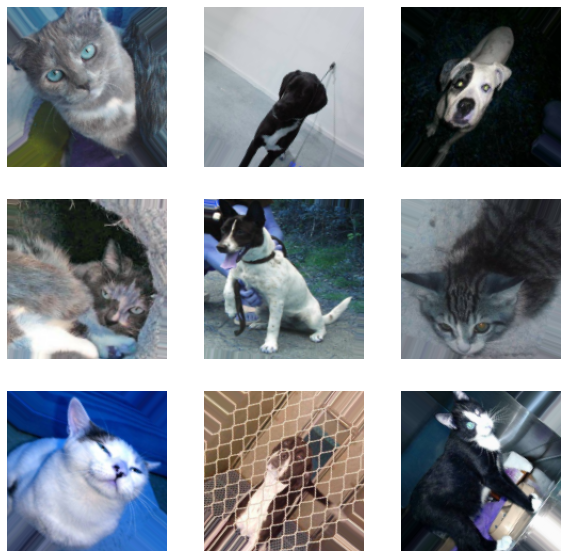

In [51]:
# Data Augmentation
# Random Rotations
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import backend as K

train_datagen = ImageDataGenerator(rotation_range=60)
train_datagen.fit(X_train)
fig = plt.figure(figsize= (10, 10))
rows = 3
cols = 3
for x_batch, y_batch in train_datagen.flow(X_train, y_train, batch_size=9):
    for i in tqdm(range(0, 9)):
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(x_batch[i])
        plt.axis("off")
    plt.show()
    break
    

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 18.11it/s]


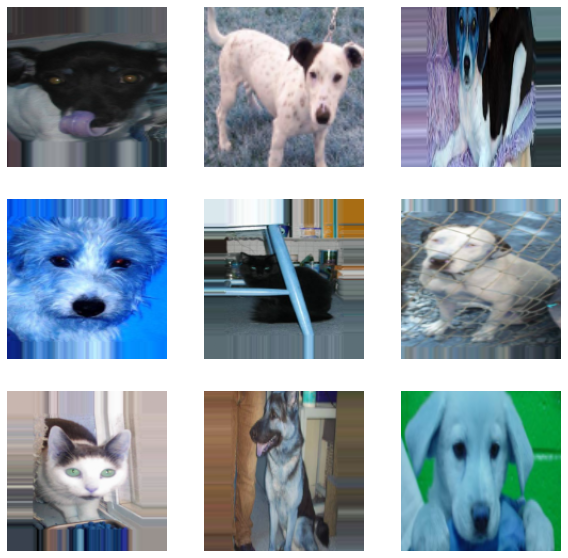

In [53]:
# Random Shearing
train_datagen = ImageDataGenerator(shear_range = 0.5, zoom_range=0.5)
train_datagen.fit(X_train)
fig = plt.figure(figsize= (10, 10))
rows = 3
cols = 3
for x_batch, y_batch in train_datagen.flow(X_train, y_train, batch_size=9):
    for i in tqdm(range(0, 9)):
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(x_batch[i])
        plt.axis("off")
    plt.show()
    break
    

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 46.39it/s]


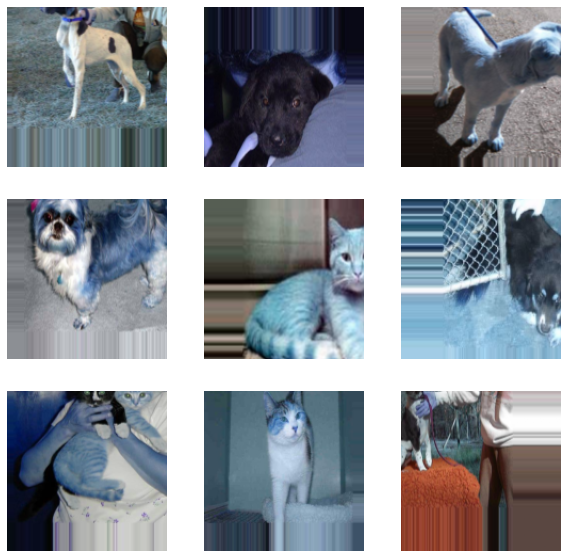

In [55]:
# Horizontal and Vertical Flips
train_datagen = ImageDataGenerator(width_shift_range=0.3, height_shift_range=0.3)
train_datagen.fit(X_train)
fig = plt.figure(figsize= (10, 10))
rows = 3
cols = 3
for x_batch, y_batch in train_datagen.flow(X_train, y_train, batch_size=9):
    for i in tqdm(range(0, 9)):
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(x_batch[i])
        plt.axis("off")
    plt.show()
    break
    

In [ ]:
# # Data Augmentation for a single image
# from tensorflow.keras.preprocessing.image import img_to_array, load_img
# datagen = ImageDataGenerator(rotation_range=40,
#                              width_shift_range=0.2,
#                              height_shift_range=0.2,
#                              shear_range= 0.2,
#                              zoom_range = 0.2,
#                              horizontal_flip = True,
#                              fill_mode='nearest')

# img = load_img('dog.jpeg')
# x = img_to_array(img)
# x = x.reshape((1,) + x.shape)

# i = 0
# for batch in datagen.flow(x, save_to_dir='output', save_prefix='dog', save_format='jpeg'):
#     i += 1
#     if i > 35:
#         break